**Trabajo Final Finanzas III**

Integrantes: Bianca Antican, Michelle Cid y Martina Marchant.



Ejercicio 1 - Valor del bono: sacado del libro Hull
Valor presente del bono: $103.54

Ejercicio 2 - Valor de la acción: sacado del libro Hull
Valor estimado de la acción: $60.00

Ejercicio 3 - Valor del futuro: sacado del libro Hull
Valor teórico del futuro: $51.52

Ejercicio 4.1 - Tipo de cambio forward: sacado del libro Hull
Tipo de cambio forward estimado: 1.6161

Ejercicio 4.2 - Valor del contrato forward: sacado del libro Hull
Valor del contrato forward: $-3.88

Ejercicio 5 - Valor de la opción Call: sacado del libro Hull
Valor de la opción call: $3.69

Ejercicio 6 - Valor del swap tasa flotante - fija: sacado del libro Hull
Valor del swap: $-1,500,000.00

Ejercicio 7 - Valor estimado de la tasa FRA 3x6: sacado del libro Hull
Tasa FRA 3x6 estimada: 5.94%



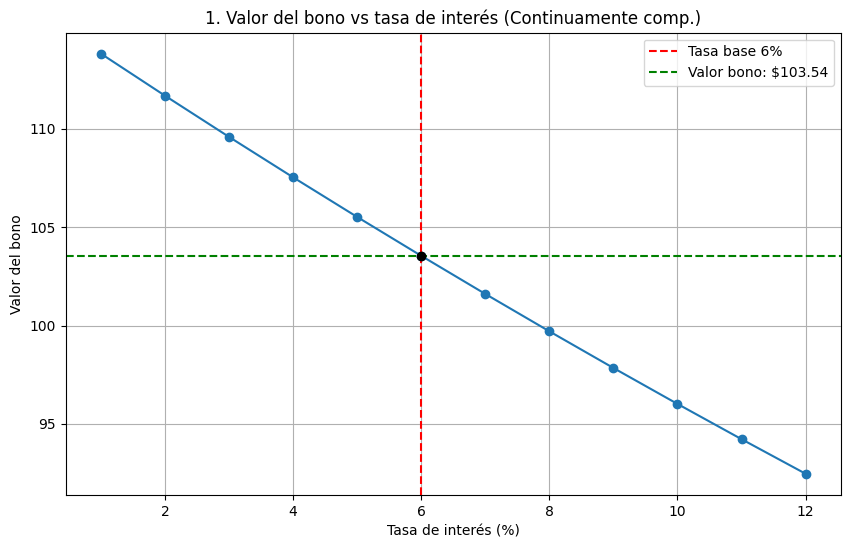

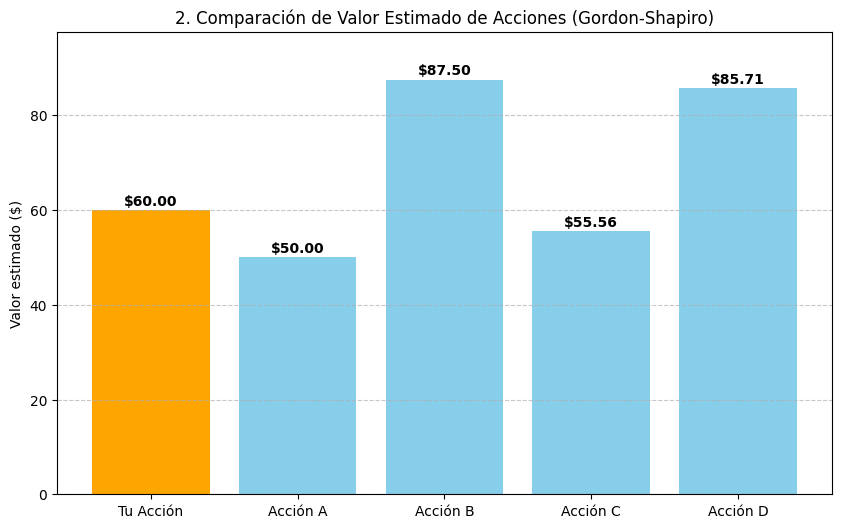

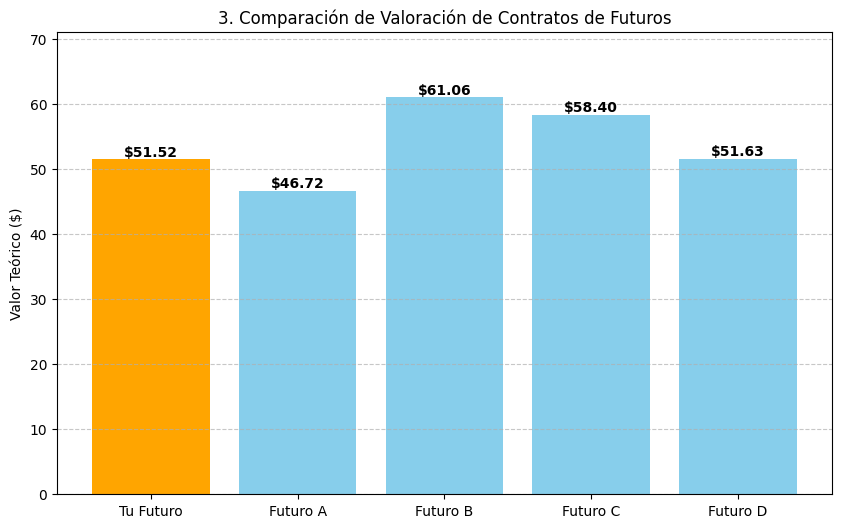

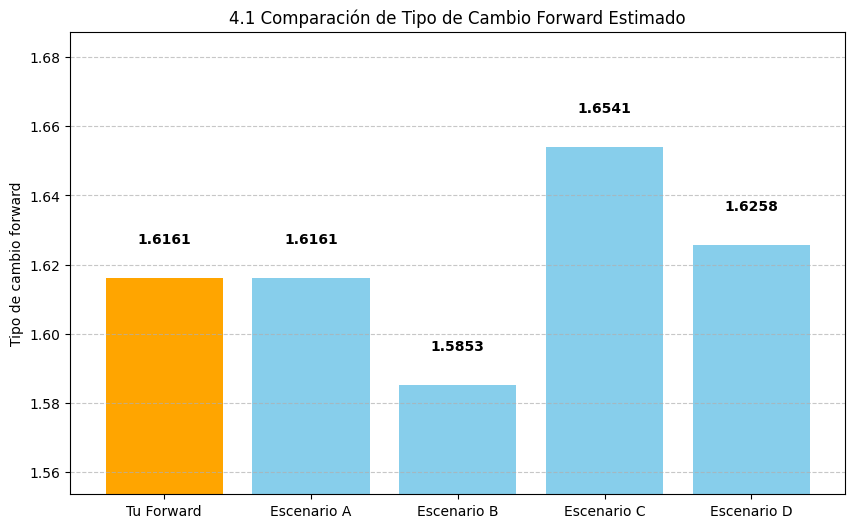

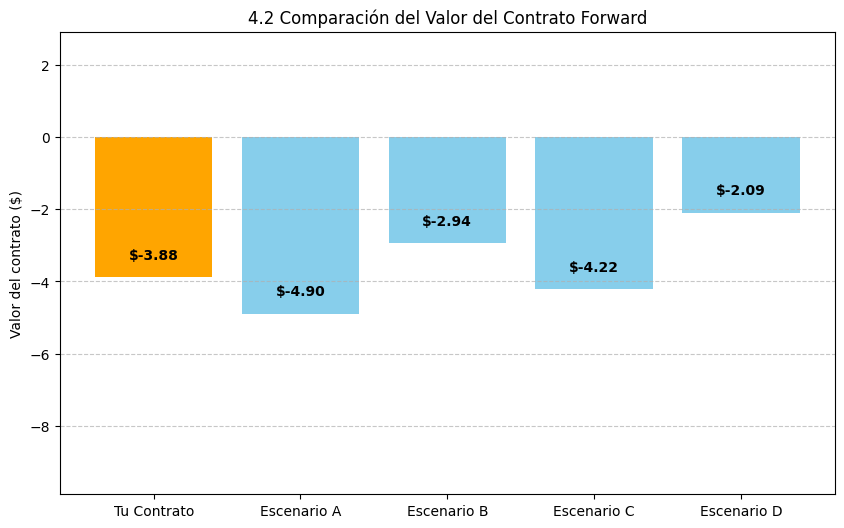

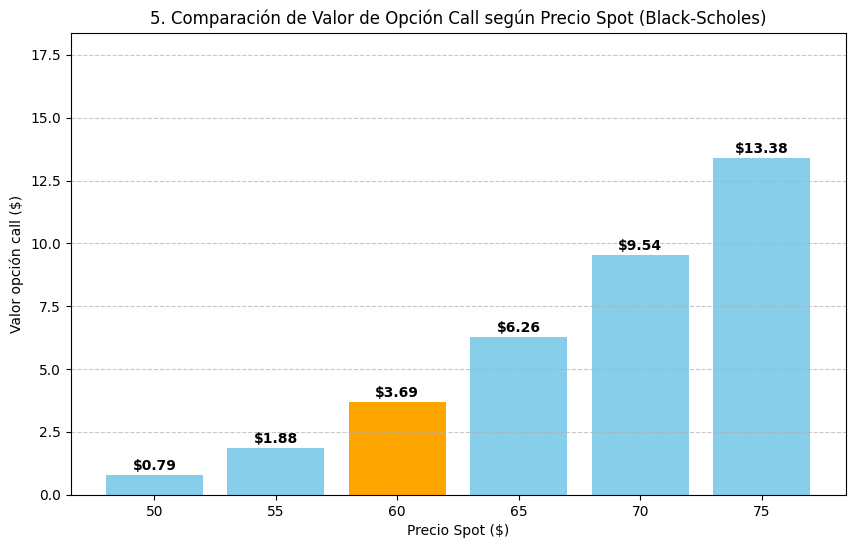

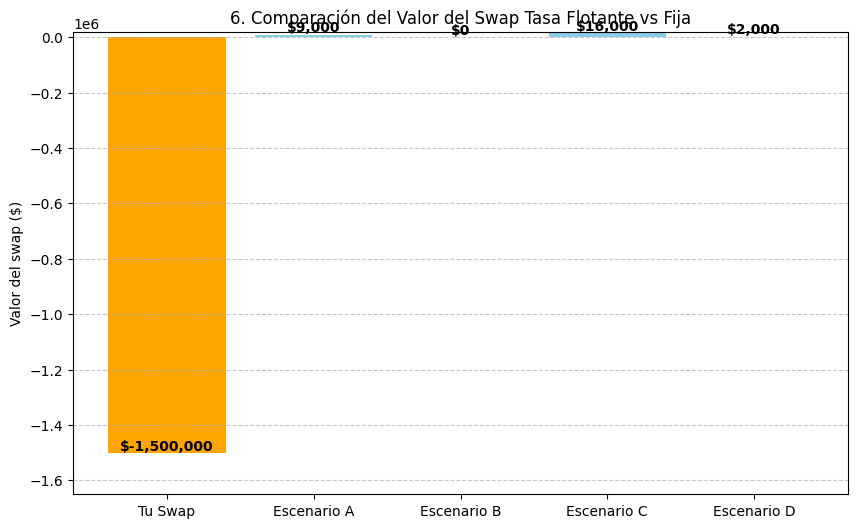

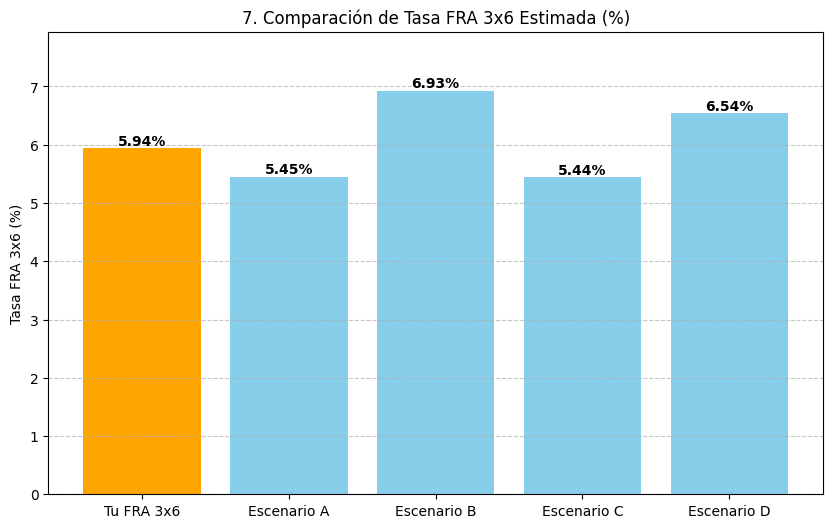

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Instalación necesaria
!pip install fpdf --quiet

import math
from scipy.stats import norm
from google.colab import files, drive
from fpdf import FPDF
import matplotlib.pyplot as plt
import numpy as np
import os

# EJERCICIOS:

# 1) VALORIZACIÓN DE BONOS
print("Ejercicio 1 - Valor del bono: sacado del libro Hull")
def valor_bono_continuo(cupon_anual, tasa_continua, años, valor_nominal, frecuencia=2):
    cupon_semestral = cupon_anual / frecuencia
    t = [i / frecuencia for i in range(1, años * frecuencia + 1)]
    valor_presente_cupones = sum(cupon_semestral * math.exp(-tasa_continua * ti) for ti in t)
    valor_presente_nominal = valor_nominal * math.exp(-tasa_continua * años)
    return valor_presente_cupones + valor_presente_nominal

# Datos del ejercicio
cupon_anual = 8   # 8% sobre valor nominal de 100
tasa_continua = 0.06
años = 2
valor_nominal = 100

valor_bono = valor_bono_continuo(cupon_anual, tasa_continua, años, valor_nominal)
print(f"Valor presente del bono: ${valor_bono:.2f}\n")

# 2) VALORIZACIÓN DE ACCIONES (Gordon-Shapiro)
print("Ejercicio 2 - Valor de la acción: sacado del libro Hull")
def valor_accion(dividendo, tasa_crecimiento, tasa_descuento):
    if tasa_descuento <= tasa_crecimiento:
        raise ValueError("La tasa de descuento debe ser mayor que la tasa de crecimiento.")
    return dividendo / (tasa_descuento - tasa_crecimiento)

# Datos del ejercicio
dividendo = 40 * 0.03  # Dividendos continuos esperados (3% de 40)
tasa_crecimiento = 0.03
tasa_descuento = 0.05
accion_valor = valor_accion(dividendo, tasa_crecimiento, tasa_descuento)

print(f"Valor estimado de la acción: ${accion_valor:.2f}\n")

# 3) VALORIZACIÓN DE FUTUROS
print("Ejercicio 3 - Valor del futuro: sacado del libro Hull")
def valor_futuro(valor_presente, tasa_interes, tiempo):
    return valor_presente * math.exp(tasa_interes * tiempo)

# Datos del ejercicio
valor_presente = 50
tasa_interes_futuro = 0.06
tiempo = 0.5  # 6 meses
futuro_valor = valor_futuro(valor_presente, tasa_interes_futuro, tiempo)

print(f"Valor teórico del futuro: ${futuro_valor:.2f}\n")

# 4.1) TIPO DE CAMBIO FORWARD
print("Ejercicio 4.1 - Tipo de cambio forward: sacado del libro Hull")
def calcular_forward(S, r_d, r_f, T):
    return S * math.exp((r_d - r_f) * T)

# Datos del ejercicio
spot = 1.60
r_usd = 0.05
r_gbp = 0.03
T_forward = 0.5
forward_fx = calcular_forward(spot, r_usd, r_gbp, T_forward)

print(f"Tipo de cambio forward estimado: {forward_fx:.4f}\n")

# 4.2) VALOR DEL CONTRATO FORWARD
print("Ejercicio 4.2 - Valor del contrato forward: sacado del libro Hull")
def valor_contrato_forward(S, K, r, T):
    return S - K * math.exp(-r * T)

# Datos del ejercicio
S_actual = 70
K_forward = 75
r = 0.06
T_remanente = 0.25
valor_forward = valor_contrato_forward(S_actual, K_forward, r, T_remanente)

print(f"Valor del contrato forward: ${valor_forward:.2f}\n")

# 5) VALOR DE LA OPCIÓN CALL (Black-Scholes)
print("Ejercicio 5 - Valor de la opción Call: sacado del libro Hull")
def valor_opcion_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

# Datos del ejercicio
S_call = 60
K = 65
T_call = 0.5
r_call = 0.05
sigma = 0.30
call_valor = valor_opcion_call(S_call, K, T_call, r_call, sigma)

print(f"Valor de la opción call: ${call_valor:.2f}\n")

# 6) VALOR DE SWAP
print("Ejercicio 6 - Valor del swap tasa flotante - fija: sacado del libro Hull")
def valor_swap(notional, fixed_rate, floating_rate, n):
    return notional * (floating_rate - fixed_rate) * n

# Datos del ejercicio
notional = 100_000_000
fixed_rate = 0.05
floating_rate = 0.045
n = 3
swap_valor = notional * (floating_rate - fixed_rate) * n

print(f"Valor del swap: ${swap_valor:,.2f}\n")

# 7) VALOR TASA FRA 3x6
print("Ejercicio 7 - Valor estimado de la tasa FRA 3x6: sacado del libro Hull")
def calcular_fra(r1, r2):
    return ((1 + r2 * 0.5) / (1 + r1 * 0.25) - 1) / 0.25

#Datos del ejercicio
r1 = 0.04  # tasa 3 meses
r2 = 0.05  # tasa 6 meses
fra_valor = calcular_fra(r1, r2)

print(f"Tasa FRA 3x6 estimada: {fra_valor * 100:.2f}%\n")

#DATOS REALES PROPORCIONADOS
# Estos son los resultados que quieres mostrar y graficar
valor_bono = 103.54
accion_valor = 60.00
futuro_valor = 51.52
forward_fx = 1.6161
valor_forward = -3.88
call_valor = 3.69
swap_valor = -1_500_000.00
fra_valor = 0.0594  # 5.94%

#GENERAR GRÁFICOS

# 1) Gráfico Valor Bono vs tasa interés
tasas = np.linspace(0.01, 0.12, 12)
valores_bono = [valor_bono_continuo(8, r, 2, 100) for r in tasas]

plt.figure(figsize=(10,6))
plt.plot(tasas*100, valores_bono, marker='o')
plt.axvline(x=0.06*100, color='red', linestyle='--', label='Tasa base 6%')
plt.axhline(y=valor_bono, color='green', linestyle='--', label=f'Valor bono: ${valor_bono:.2f}')
plt.scatter(6, valor_bono, color='black', zorder=5)
plt.title("1. Valor del bono vs tasa de interés (Continuamente comp.)")
plt.xlabel("Tasa de interés (%)")
plt.ylabel("Valor del bono")
plt.legend()
plt.grid(True)
plt.savefig("grafico_1.png")
plt.show()
plt.close()

# 2) Gráfico Valor de la acción (Gordon-Shapiro)
acciones = {
    "Tu Acción": accion_valor,
    "Acción A": valor_accion(2.0, 0.02, 0.06),
    "Acción B": valor_accion(3.5, 0.04, 0.08),
    "Acción C": valor_accion(2.5, 0.025, 0.07),
    "Acción D": valor_accion(3.0, 0.03, 0.065),
}
nombres = list(acciones.keys())
valores = list(acciones.values())
colores = ['orange' if nombre == "Tu Acción" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("2. Comparación de Valor Estimado de Acciones (Gordon-Shapiro)")
plt.ylabel("Valor estimado ($)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"${yval:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(valores) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_2.png")
plt.show()
plt.close()

# 3) Gráfico Valor del futuro
futuros = {
    "Tu Futuro": futuro_valor,
    "Futuro A": valor_futuro(45, 0.05, 0.75),
    "Futuro B": valor_futuro(60, 0.07, 0.25),
    "Futuro C": valor_futuro(55, 0.06, 1.0),
    "Futuro D": valor_futuro(50, 0.08, 0.4),
}
nombres = list(futuros.keys())
valores = list(futuros.values())
colores = ['orange' if nombre == "Tu Futuro" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("3. Comparación de Valoración de Contratos de Futuros")
plt.ylabel("Valor Teórico ($)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"${yval:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(valores) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_3.png")
plt.show()
plt.close()

# 4.1) Gráfico Tipo de cambio forward
forwards = {
    "Tu Forward": forward_fx,
    "Escenario A": calcular_forward(1.60, 0.04, 0.02, 0.5),
    "Escenario B": calcular_forward(1.55, 0.06, 0.03, 0.75),
    "Escenario C": calcular_forward(1.65, 0.05, 0.04, 0.25),
    "Escenario D": calcular_forward(1.60, 0.07, 0.03, 0.4),
}
nombres = list(forwards.keys())
valores = list(forwards.values())
colores = ['orange' if nombre == "Tu Forward" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("4.1 Comparación de Tipo de Cambio Forward Estimado")
plt.ylabel("Tipo de cambio forward")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontweight='bold')
plt.ylim(min(valores)*0.98, max(valores)*1.02)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_4.1.png")
plt.show()
plt.close()

# 4.2) Gráfico Valor contrato forward
forward_values = {
    "Tu Contrato": valor_forward,
    "Escenario A": valor_contrato_forward(68, 74, 0.05, 0.3),
    "Escenario B": valor_contrato_forward(72, 76, 0.07, 0.2),
    "Escenario C": valor_contrato_forward(69, 75, 0.06, 0.4),
    "Escenario D": valor_contrato_forward(70, 73, 0.05, 0.25),
}
nombres = list(forward_values.keys())
valores = list(forward_values.values())
colores = ['orange' if nombre == "Tu Contrato" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("4.2 Comparación del Valor del Contrato Forward")
plt.ylabel("Valor del contrato ($)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"${yval:.2f}", ha='center', fontweight='bold')
plt.ylim(min(valores)-5, max(valores)+5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_4.2.png")
plt.show()
plt.close()

# 5) Gráfico Valor opción call
precios_spot = [50, 55, 60, 65, 70, 75]
valores_opcion = [valor_opcion_call(S, 65, 0.5, 0.05, 0.30) for S in precios_spot]

colores = ['orange' if S == 60 else 'skyblue' for S in precios_spot]

plt.figure(figsize=(10,6))
bars = plt.bar([str(s) for s in precios_spot], valores_opcion, color=colores)
plt.title("5. Comparación de Valor de Opción Call según Precio Spot (Black-Scholes)")
plt.xlabel("Precio Spot ($)")
plt.ylabel("Valor opción call ($)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"${yval:.2f}", ha='center', fontweight='bold')
plt.ylim(0, max(valores_opcion)+5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_5.png")
plt.show()
plt.close()

# 6) Gráfico Valor swap
swaps = {
    "Tu Swap": swap_valor,
    "Escenario A": valor_swap(1_000_000, 0.046, 0.049, 3),
    "Escenario B": valor_swap(1_000_000, 0.05, 0.05, 3),
    "Escenario C": valor_swap(1_000_000, 0.048, 0.052, 4),
    "Escenario D": valor_swap(1_000_000, 0.047, 0.048, 2),
}
nombres = list(swaps.keys())
valores = list(swaps.values())
colores = ['orange' if nombre == "Tu Swap" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("6. Comparación del Valor del Swap Tasa Flotante vs Fija")
plt.ylabel("Valor del swap ($)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10_000, f"${yval:,.0f}", ha='center', fontweight='bold')
min_val = min(valores)
max_val = max(valores)
plt.ylim(min_val * 1.1 if min_val < 0 else min_val * 0.9, max_val * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_6.png")
plt.show()
plt.close()

# 7) Gráfico Tasa FRA 3x6
escenarios = {
    "Tu FRA 3x6": fra_valor,
    "Escenario A": calcular_fra(0.035, 0.045),
    "Escenario B": calcular_fra(0.04, 0.055),
    "Escenario C": calcular_fra(0.045, 0.05),
    "Escenario D": calcular_fra(0.038, 0.052),
}
nombres = list(escenarios.keys())
valores = [v * 100 for v in escenarios.values()]
colores = ['orange' if nombre == "Tu FRA 3x6" else 'skyblue' for nombre in nombres]

plt.figure(figsize=(10,6))
bars = plt.bar(nombres, valores, color=colores)
plt.title("7. Comparación de Tasa FRA 3x6 Estimada (%)")
plt.ylabel("Tasa FRA 3x6 (%)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, max(valores)+1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("grafico_7.png")
plt.show()
plt.close()

# CREAR PDF

# Montar Google Drive para acceder al logo
drive.mount('/content/drive')

logo_path = "/content/drive/MyDrive/Transformación Digital 2/Datos/logo usach.png"

class PDFConLogo(FPDF):
    def header(self):
        if os.path.exists(logo_path):
            self.image(logo_path, x=self.w - 30, y=10, w=20)
        self.set_y(25)

def agregar_texto(pdf, texto):
    pdf.set_font("Arial", "", 12)
    pdf.multi_cell(0, 10, texto)
    pdf.ln(4)

def agregar_grafico_pdf(pdf, ruta_imagen, titulo, descripcion=""):
    if os.path.exists(ruta_imagen):
        pdf.add_page()
        pdf.set_font("Arial", "B", 14)
        pdf.cell(0, 10, titulo, ln=True, align="C")
        pdf.ln(5)
        pdf.image(ruta_imagen, x=20, w=170)
        if descripcion:
            pdf.ln(5)
            pdf.set_font("Arial", "", 12)
            pdf.multi_cell(0, 10, descripcion)
    else:
        print(f"La imagen {ruta_imagen} no existe.")


pdf = PDFConLogo()
pdf.set_auto_page_break(auto=True, margin=15)

# Portada
pdf.add_page()  # Add this line to create the first page
pdf.set_font("Arial", "B", 22)
pdf.ln(50)  # Espaciado desde arriba
pdf.cell(0, 15, "Informe de Valoración de Activos Financieros", ln=True, align="C")

pdf.set_font("Arial", "", 16)
pdf.ln(5)
pdf.cell(0, 10, "Trabajo Final", ln=True, align="C")

pdf.ln(25)
pdf.set_font("Arial", size=14)
pdf.cell(0, 10, "Integrantes:", ln=True, align="C")
pdf.cell(0, 10, "Michelle Cid, Martina Marchant y Bianca Antican.", ln=True, align="C")

pdf.ln(10)
pdf.cell(0, 10, "Curso: Finanzas III", ln=True, align="C")
pdf.cell(0, 10, "Profesor: Carlos Cavieres", ln=True, align="C")
pdf.cell(0, 10, "Ayudante: Valentina Aguilera", ln=True, align="C")

pdf.ln(10)
pdf.cell(0, 10, "Fecha: Junio 2025", ln=True, align="C")

pdf.ln(20)
pdf.set_font("Arial", "I", 12)
pdf.cell(0, 10, "Universidad de Santiago de Chile", ln=True, align="C")

# Resumen resultados
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Resumen de Resultados", ln=True, align="C")
pdf.ln(10)
pdf.set_font("Arial", "", 12)

resumen = [
    f"Ejercicio 1) Valor presente del bono: ${valor_bono:.2f}" ,
    f"Ejercicio 2) Valor estimado de la acción: ${accion_valor:.2f}",
    f"Ejercicio 3) Valor teórico del futuro: ${futuro_valor:.2f}",
    f"Ejercicio 4.1) Tipo de cambio forward estimado: {forward_fx:.4f}" ,
    f"Ejercicio 4.2) Valor del contrato forward: ${valor_forward:.2f}",
    f"Ejercicio 5) Valor de la opción call: ${call_valor:.2f}" ,
    f"Ejercicio 6) Valor del Swap tasa flotante-fija: ${swap_valor:,.2f}",
    f"Ejercicio 7) Valor Tasa FRA 3x6 estimada: {fra_valor*100:.2f}%",
]

for linea in resumen:
    agregar_texto(pdf, linea)

# Lista gráficos con título y descripción
graficos = [
    ("grafico_1.png", "1. Valor del bono vs tasa de interés",
     f"El valor presente calculado del bono es de $103.54, lo que refleja que, bajo la tasa continua aplicada, el bono tiene un precio ligeramente superior a su valor nominal de $100. El gráfico muestra cómo el valor del bono disminuye a medida que las tasas de interés aumentan, destacando la sensibilidad de los bonos a cambios en las tasas. Esta información es clave para inversionistas que buscan anticipar variaciones en el valor de sus inversiones frente a fluctuaciones en las tasas de mercado."),

    ("grafico_2.png", "2. Valor de la acción (Gordon-Shapiro)",
     f"El valor estimado de la acción es de $60.00 según el modelo Gordon-Shapiro, que considera los dividendos y el crecimiento esperado. El gráfico evidencia cómo este valor se compara con otras acciones hipotéticas y cómo pequeñas variaciones en las tasas de crecimiento o descuento impactan significativamente la valoración. Esto ayuda a los inversionistas a entender la importancia de las expectativas de crecimiento para el precio justo de una acción."),

    ("grafico_3.png", "3. Valor del contrato de futuros",
     f"Con un valor teórico de $51.52 para el contrato de futuros, el gráfico ilustra cómo se ajusta el precio futuro en función del valor presente y la tasa de interés continua aplicada. Este análisis es esencial para quienes utilizan futuros como instrumentos de cobertura o especulación, ya que les permite visualizar el valor esperado y anticipar ganancias o pérdidas al vencimiento."),

    ("grafico_4.1.png", "4.1 Tipo de cambio forward",
     f"l tipo de cambio forward estimado es 1.6161, lo que indica el precio pactado hoy para comprar o vender la divisa en el futuro. El gráfico muestra cómo esta tasa forward varía bajo diferentes escenarios de tasas de interés entre las dos monedas involucradas, siendo un dato fundamental para empresas que buscan protegerse frente a la volatilidad cambiaria en operaciones internacionales."),

    ("grafico_4.2.png", "4.2 Valor del contrato forward",
     f"El valor calculado del contrato forward es negativo, con -$3.88, reflejando una posición desfavorable bajo las condiciones actuales del mercado y los parámetros usados. El gráfico permite comparar esta valoración con otros escenarios, facilitando la comprensión del riesgo y la posible pérdida o ganancia en la negociación de contratos a plazo."),

    ("grafico_5.png", "5. Valor de la opción call (Black-Scholes)",
     f"El valor de la opción call es $3.69, indicando que bajo las condiciones de volatilidad, tiempo y precio del activo subyacente, la opción tiene un valor positivo pero moderado. El gráfico muestra cómo el valor de la opción cambia con diferentes precios spot, lo que es útil para inversores y traders para ajustar sus estrategias según la evolución del mercado."),

    ("grafico_6.png", "6. Valor del swap tasa flotante-fija",
     f"El swap presenta un valor negativo de -$1,500,000.00, lo que implica que, en las condiciones actuales, la contraparte que recibe la tasa fija está en una posición desfavorable respecto a la tasa flotante. El gráfico ayuda a visualizar cómo el valor del swap puede fluctuar y la importancia de estos contratos para la gestión de riesgos de tasas de interés en instituciones financieras."),

    ("grafico_7.png", "7. Tasa FRA 3x6 estimada",
     f"La tasa FRA 3x6 estimada es 5.94%, reflejando la expectativa del mercado sobre la tasa de interés para el período comprendido entre tres y seis meses en el futuro. El gráfico compara esta tasa con otros escenarios, permitiendo a los usuarios anticipar movimientos en las tasas a corto plazo y planificar sus operaciones financieras con mayor certeza."),
]

for archivo, titulo, descripcion in graficos:
    agregar_grafico_pdf(pdf, archivo, titulo, descripcion)

# Conclusión general
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Conclusión General", ln=True)
pdf.set_font("Arial", "", 12)
conclusion_general = (
    "En este informe se realizó la valoración de diversos instrumentos financieros clave, "
    "aplicando modelos reconocidos como el descuento continuo para bonos, el modelo de Gordon-Shapiro para acciones, "
    "Black-Scholes para opciones, y análisis específicos para futuros, forwards, swaps y contratos FRA. Los resultados "
    "reflejan el valor intrínseco de cada instrumento bajo las condiciones actuales del mercado, así como su sensibilidad "
    "a variables relevantes como tasas de interés, volatilidad y horizonte temporal.\n\n"

    "El valor presente del bono, ligeramente superior a su valor nominal, indica un entorno de tasas relativamente bajas, "
    "lo cual eleva el precio de los bonos. La valoración de la acción, basada en las expectativas de crecimiento y dividendos "
    "futuros, resalta la importancia de estos factores en la determinación del precio justo en mercados de renta variable. "
    "Por su parte, la valoración del contrato de futuros y del contrato forward evidencia la influencia directa de las tasas "
    "de interés y el costo del dinero en la fijación de precios para operaciones a plazo y estrategias de cobertura.\n\n"

    "El análisis del swap, con un valor negativo significativo, pone de manifiesto los riesgos que enfrentan las contrapartes "
    "dependiendo de la evolución relativa entre tasas flotantes y fijas, subrayando la utilidad de estos instrumentos para una "
    "gestión activa del riesgo financiero. Además, la tasa FRA estimada ofrece una anticipación sobre las expectativas de movimientos "
    "futuros en las tasas de interés a corto plazo, información valiosa para la toma de decisiones en mercados monetarios.\n\n"

    "Los gráficos presentados en este informe complementan la interpretación de los resultados, facilitando una visualización clara "
    "y comparativa de los valores obtenidos y su comportamiento ante variaciones en las variables financieras. Esta integración entre "
    "análisis cuantitativo y representación visual es fundamental para apoyar decisiones estratégicas informadas por parte de inversionistas, "
    "analistas y gestores financieros.\n\n"

    "En conclusión, el estudio evidencia la importancia de utilizar modelos financieros sólidos para valorar instrumentos complejos, considerando "
    "siempre el contexto económico y las condiciones del mercado. La correcta interpretación de estos valores es esencial para una gestión eficiente "
    "de portafolios y para la administración adecuada del riesgo en el entorno financiero actual."
)
pdf.multi_cell(0, 10, conclusion_general)
# Guardar y descargar
nombre_pdf = "Informe_Valoracion_Activos_Financieros(Antican, Cid, Marchant).pdf"
pdf.output(nombre_pdf)
files.download(nombre_pdf)